<a id="top"></a>
<h1 style="font-size:50px; color:#3A71AE"><center>Wrangle, Analyze and Visualize WeRateDogs</center></h1>

<a id="id_1"></a>
<h1 style="font-size:30px; color:#3A71AE">Introduction</h1>

[**Data wrangling**](https://en.wikipedia.org/wiki/Data_wrangling) or sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

**Note:** In this project I have done all the **Data Wrangling** process, i.e., `gathering`, `assessing` and `cleaning`, then I `explored` and `analyzed` the data to find some answers for my questions, and finally, I `visualized` what I have found and displayed that in this slideshow.

<a id="id_2"></a>
<h1 style="font-size:30px; color:#3A71AE">The Dataset</h1>

**The dataset** we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10 (`11/10`, `12/10`, `13/10`, etc).

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os

# Data folder direction
folder_data = 'data'

# specify the database direction
database_dir = os.path.join(folder_data, 'twitter_archive_master.db')

# Create SQLAlchemy Engine and empty we_rate_dogs_tweets database
engine = create_engine('sqlite:///{}'.format(database_dir))

enhanced_archive_master = pd.read_sql('SELECT * FROM enhanced_archive_master', engine)
image_predictions_master = pd.read_sql('SELECT * FROM image_predictions_master', engine)

<a id="id_3"></a>
<h1 style="font-size:30px; color:#3A71AE">Analyzing and Visualizing</h1>

### **The 4 questions I had:**
1. [**Which dog stage has the highest rate on average?**](#id_3_1)
2. [**Which dog stage has the highest favorite counts?**](#id_3_2)
3. [**How good our neural network in predicting the dogs breed correctly?**](#id_3_3)
4. [**What are the top 10 frequent breeds in our tweets data?**](#id_3_4)

<a id="id_3_1"></a>
## [Which dog stage has the highest rate on average?](#id_3_1)
Dog stage **Puppo** has the highest average rate among the other stages, followed by **Floofer**, **Doggo** and **Pupper** respectively.

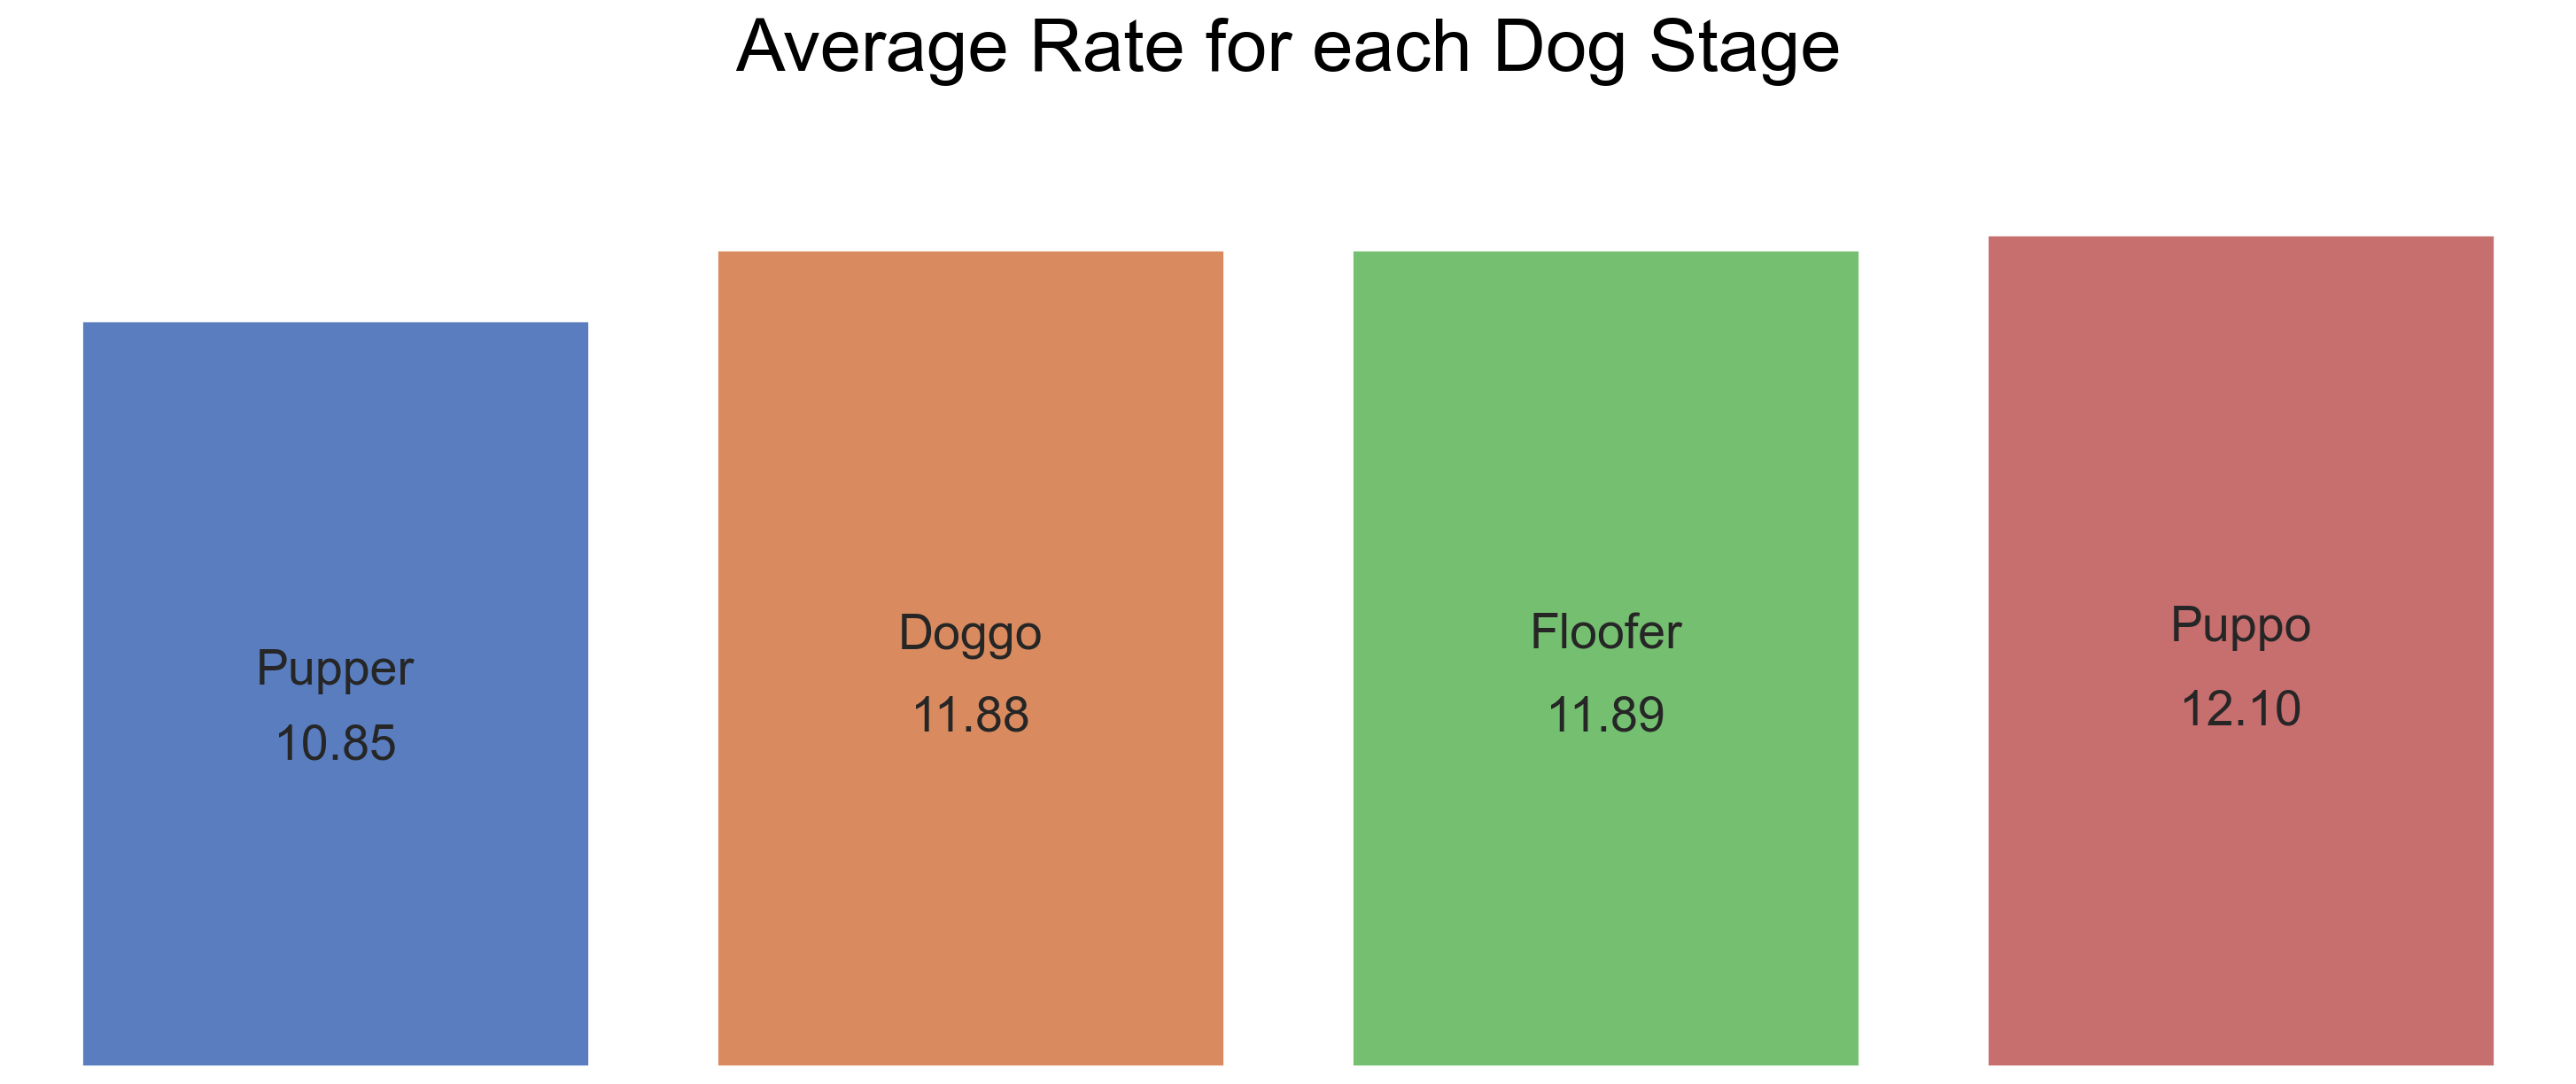

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.rcdefaults()

sb.set(style='white')

plt.rcParams['figure.dpi']= 200 # Set figure DPI
plt.rcParams["figure.figsize"] = [14.70, 6.27] # Set figure default size
plt.rcParams['ytick.labelsize'], plt.rcParams['xtick.labelsize'] = 22, 22 # Set label size
plt.rcParams['font.size'] = 12 # Set default font size

# Average for each stage
stage_rate_avg = enhanced_archive_master.groupby('stage').rating_numerator.mean().sort_values(ascending=False)
stage_rate_avg = stage_rate_avg.sort_values() # Sort values

muted_colors = pd.Series(sb.color_palette('muted')[:4]) # Muted colors

ax = sb.barplot(x = stage_rate_avg.index, y = stage_rate_avg, palette = muted_colors) # Create bar plot

plt.title('Average Rate for each Dog Stage', fontsize=30, y = 1.02, color = 'black') # Set title

# Remove x, y labels and x, y ticks
plt.xlabel(''), plt.xticks(ticks = plt.xticks()[0], labels = '')
plt.ylabel(''), plt.yticks(ticks = plt.yticks()[0], labels = '')

sb.despine(left = True, bottom = True) # Remove plot borders

#ax.tick_params(labelsize=20) # Increase label size

for p, name in zip(ax.patches, stage_rate_avg.index): # Add annotation for each patch
    ax.annotate(text       = format(name),
                xy         = (p.get_x() + p.get_width() / 2., p.get_height() - (p.get_height() * 0.5)),
                ha         = 'center', va = 'center',
                xytext     = (0, 9),
                textcoords = 'offset points',
                fontsize=20)
    
for p in ax.patches: # Add annotation for each patch
    ax.annotate(text       = format(p.get_height(), '.2f'),
                xy         = (p.get_x() + p.get_width() / 2., p.get_height() - (p.get_height() * 0.6)),
                ha         = 'center', va = 'center',
                xytext     = (0, 9),
                textcoords = 'offset points',
                fontsize=20)

plt.tight_layout(); # Improve appearance

<a id="id_3_2"></a>
## [Which dog stage has the highest favorite counts?](#id_3_2)
Well, dog stage **Puppo** still on the lead, but dog stage **Doggo** took a step in the rankings followed by **Floofer** and **Pupper** respectively!!

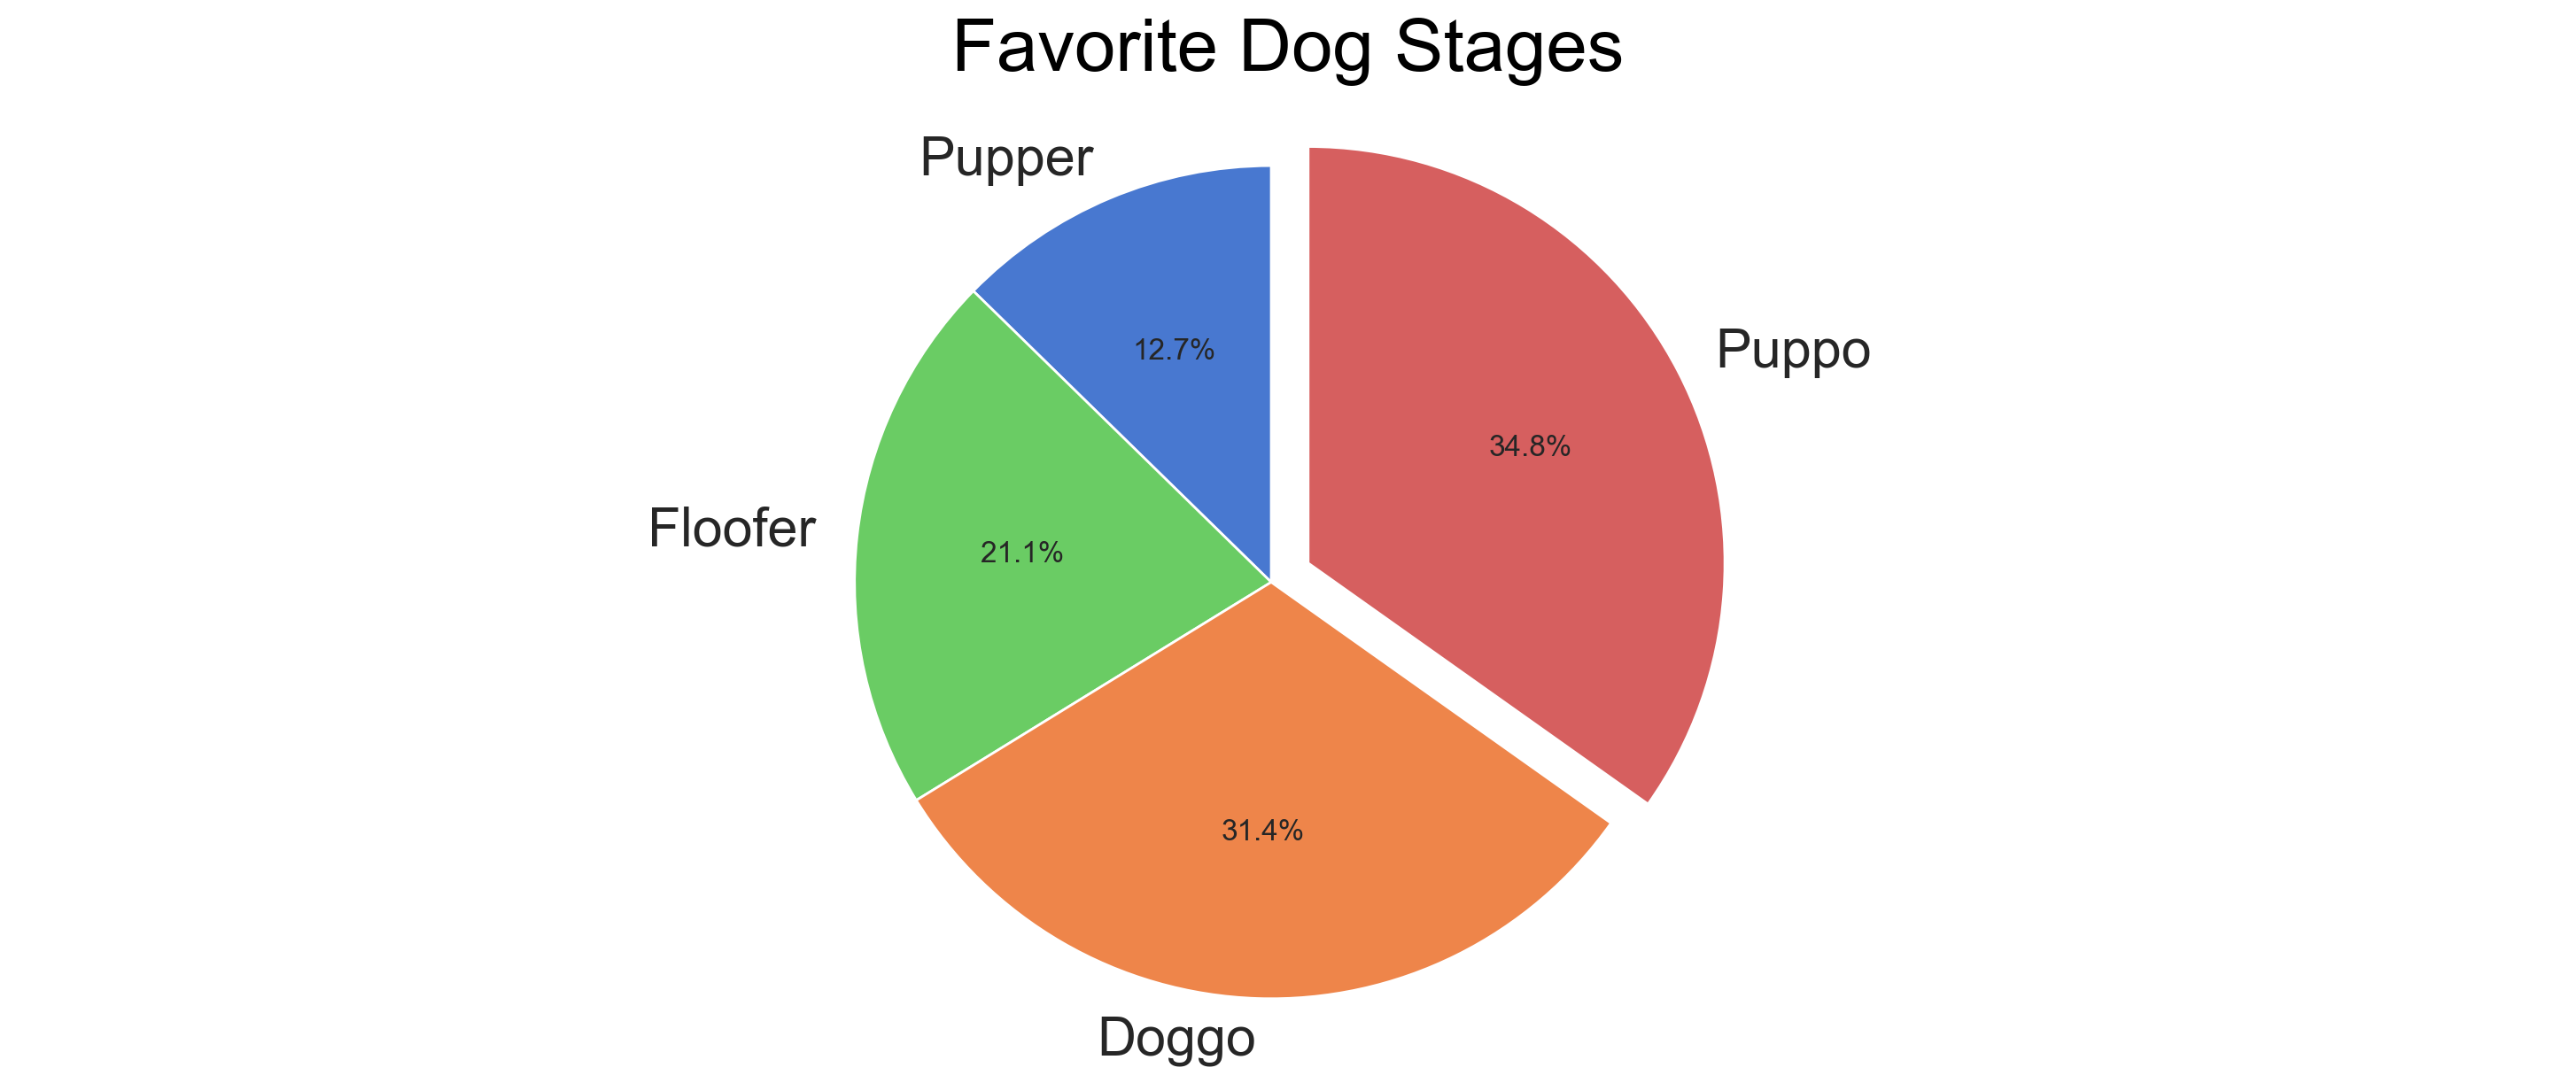

In [3]:
# The favorite count for each stage
favorite_stage_counts = enhanced_archive_master.groupby('stage').favorite_count.mean().sort_values(ascending=False)

labels = favorite_stage_counts.sort_values().index.values
sizes = favorite_stage_counts.sort_values().values
explode = (0, 0, 0, 0.1)

fig, ax = plt.subplots(figsize=[14.70, 6.27])

# Rearrange the corols to match the same dog stages order as previous
muted_colors_re = muted_colors.loc[[0, 2, 1, 3]].values

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, colors = muted_colors_re)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title('Favorite Dog Stages', fontsize=30, y = 1.02, color = 'black')

plt.tight_layout(); # Improve appearance

<a id="id_3_3"></a>
## [How good our neural network in predicting the dogs breed correctly?](#id_3_3)
We have a **good neural** network with almost `0.73%` accuracy in predicting the dog breeds.

<a id="id_3_4"></a>
## [What are the top 10 frequent breeds in our tweets data?](#id_3_4)
**Golden Retriever**, **Labrador Retriever** and **Chihuahua** are our top 3 breeds followed by the rest as shown below.

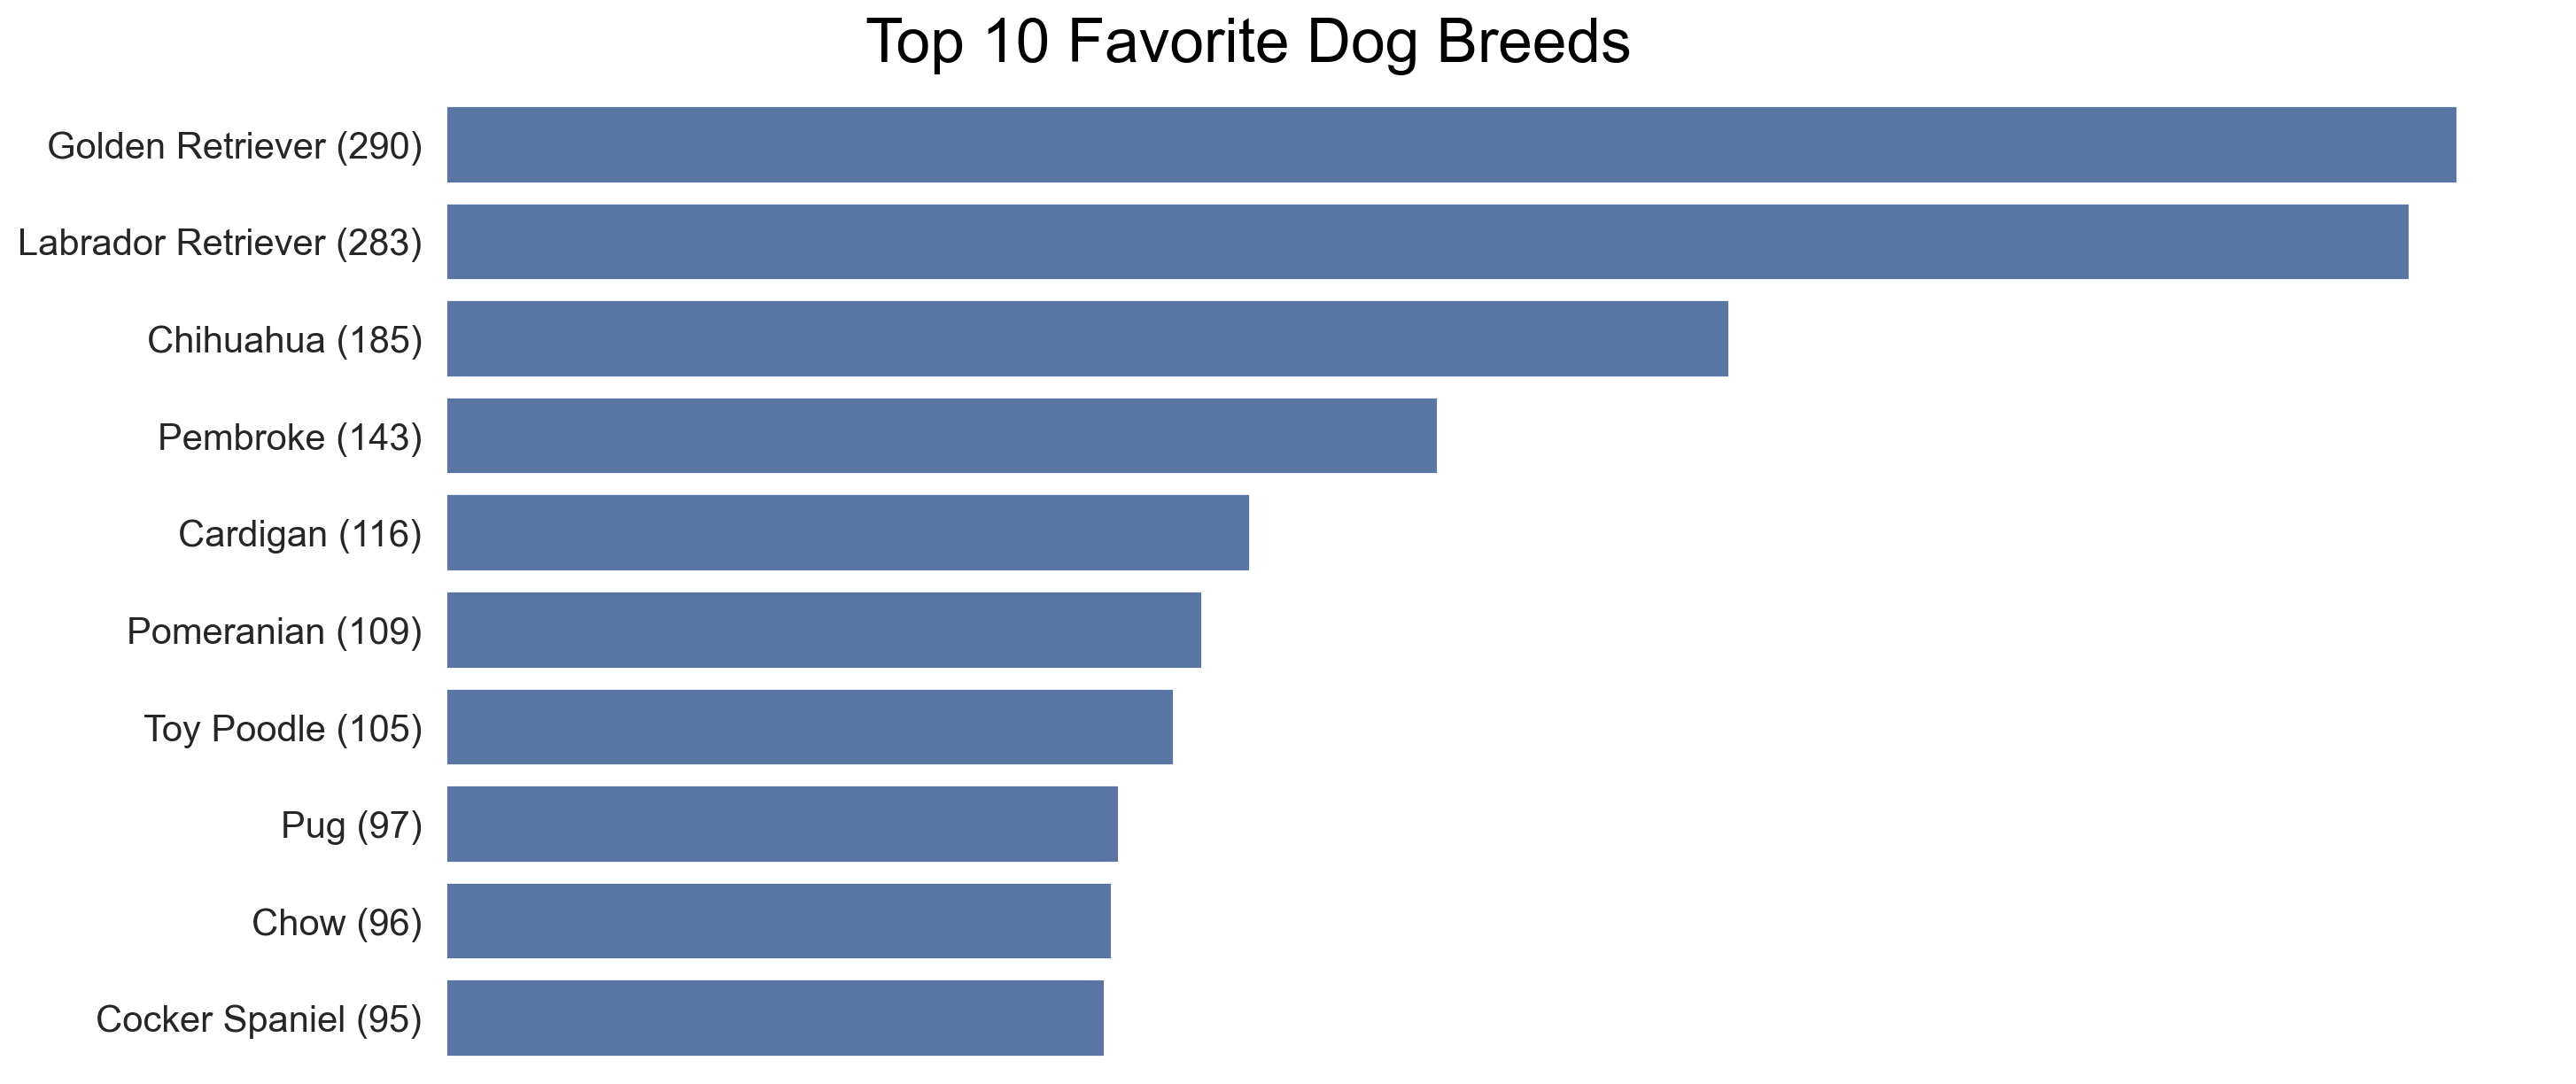

In [4]:
# The top 10 breeds
top_10_breeds = image_predictions_master.prediction.value_counts()[:10] # Top 10 breeds

# Adding the count to each index
top_10_breeds_new_index = ["{} ({})".format(i, v) for i, v in zip(top_10_breeds.index, top_10_breeds.values)]
top_10_breeds.index = top_10_breeds_new_index

base_color = sb.color_palette()[0]
sb_barplot = sb.barplot(y = top_10_breeds.index, x = top_10_breeds.values, color = base_color) # Create bar plot

plt.title('Top 10 Favorite Dog Breeds', fontsize=25, y = 1.02, x = 0.38, color = 'black') # Add titles
sb.despine(left = True, bottom = True) # Remove plot borders


sb_barplot.tick_params(labelsize=15)
plt.xticks([])

plt.tight_layout(); # Improve appearance

<img src="src/ty.png">